In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

def punto_fijo(po,f,Nmax): #Punto fijo 
  g=lambda x:f(x)+x
  i=0
  p=po
  while i<Nmax:
    p=g(p)
    i+=1
        
  return p

def secante(f,p0,p1,tol): #Método secante
  n=0
    
  pn_1=p1
  pn_2=p0
    
  while abs(pn_1-pn_2) > tol:
      pn=pn_1-(f(pn_1)*(pn_1-pn_2))/(f(pn_1)-f(pn_2))
        
      #Descarto    0,1,2....
      pn_2 = pn_1 #1,2,3...
      pn_1 = pn   #2,3,4...
        
      n+=1
        
  #print('Raiz encontrada en',n,'iteraciones')
  return pn

def NR(f,xo,tol): # Método de Newton 
  i=xo
  while abs(f(i))>tol:
    i=i-f(i)*(1e-7)/(f(i+1e-7)-f(i))
    #V={"Raíz por método de Newton":i}
    return i

In [ ]:
#optimize.secant(g,1,2)

**1)**  $$m(T)=tanh (\frac{m(T)}{T})$$

In [157]:
T=0.5
def f(m):
  return m-np.tanh(m/T)

def g(m):
  return m-f(m)

def raiz_m(T,f,po,p1,tol):
  return secante(f,po,p1,tol)

In [339]:
#a
round(raiz_m(0.5,f,0.1,0.99,1e-7),3) #Secante

0.958

In [338]:
#b
round(float(optimize.fixed_point(g,2.5)),3) #Punto fijo

0.958

No handles with labels found to put in legend.


Text(0, 0.5, 'Magnetismo (m)')

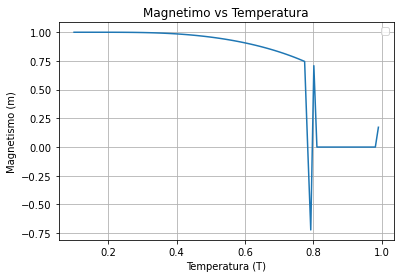

In [430]:
#d
def m(T):
  def f(m):
    return m-np.tanh(m/T)
  return secante(f,0.1,0.99,1e-7)
T = np.linspace(0.1,0.99,100)
plt.plot(T,[m(T[i]) for i in range(len(T))])
plt.title("Magnetimo vs Temperatura")
plt.grid()
plt.legend()
plt.xlabel("Temperatura (T)")
plt.ylabel("Magnetismo (m)")

#plt.scatter(T,[m(T[i]) for i in range(len(T))])

  

In [433]:
y=np.zeros(len(T))
for i in range(len(T)):
  y[i]=m(T[i])


In [513]:
from scipy.interpolate import lagrange
poly=lagrange(T,y)
poly

poly1d([ 2.25521273e+68, -1.21175268e+70,  3.21502528e+71, -5.61545897e+72,
        7.26299770e+73, -7.41909270e+74,  6.23395072e+75, -4.43130483e+76,
        2.71989926e+77, -1.46422423e+78,  6.99891911e+78, -3.00003630e+79,
        1.16261457e+80, -4.10129748e+80,  1.32463177e+81, -3.93651731e+81,
        1.08103199e+82, -2.75362201e+82,  6.52744918e+82, -1.44419407e+83,
        2.99006395e+83, -5.80655928e+83,  1.05985954e+84, -1.82174179e+84,
        2.95375129e+84, -4.52459802e+84,  6.55713419e+84, -9.00182238e+84,
        1.17201811e+85, -1.44872745e+85,  1.70179957e+85, -1.90144542e+85,
        2.02238596e+85, -2.04912881e+85,  1.97920851e+85, -1.82346193e+85,
        1.60334176e+85, -1.34616508e+85,  1.07971839e+85, -8.27636394e+84,
        6.06517563e+84, -4.25071064e+84,  2.84981273e+84, -1.82815629e+84,
        1.12238557e+84, -6.59593818e+83,  3.71086959e+83, -1.99886528e+83,
        1.03093117e+83, -5.09130878e+82,  2.40759789e+82, -1.09013492e+82,
        4.72597322e+81, 

In [515]:
#T1=np.linspace(0,1,100)
#plt.plot(T1, poly(T1))
#plt.scatter(T1, poly(T1),color='red')


In [500]:
d=(T ,y)
d

(array([0.1       , 0.1089899 , 0.1179798 , 0.1269697 , 0.1359596 ,
        0.14494949, 0.15393939, 0.16292929, 0.17191919, 0.18090909,
        0.18989899, 0.19888889, 0.20787879, 0.21686869, 0.22585859,
        0.23484848, 0.24383838, 0.25282828, 0.26181818, 0.27080808,
        0.27979798, 0.28878788, 0.29777778, 0.30676768, 0.31575758,
        0.32474747, 0.33373737, 0.34272727, 0.35171717, 0.36070707,
        0.36969697, 0.37868687, 0.38767677, 0.39666667, 0.40565657,
        0.41464646, 0.42363636, 0.43262626, 0.44161616, 0.45060606,
        0.45959596, 0.46858586, 0.47757576, 0.48656566, 0.49555556,
        0.50454545, 0.51353535, 0.52252525, 0.53151515, 0.54050505,
        0.54949495, 0.55848485, 0.56747475, 0.57646465, 0.58545455,
        0.59444444, 0.60343434, 0.61242424, 0.62141414, 0.63040404,
        0.63939394, 0.64838384, 0.65737374, 0.66636364, 0.67535354,
        0.68434343, 0.69333333, 0.70232323, 0.71131313, 0.72030303,
        0.72929293, 0.73828283, 0.74727273, 0.75

**2)**

In [172]:
df=pd.read_csv("https://raw.githubusercontent.com/hernansalinas/Curso_Metodos_Computacionales/main/Entregas/Parciales/Parcial1/dataset/Temperature_Bogota_Barcelona.csv")
df

,Unnamed: 0,Year,City,Month,Day,AvgTemperature
0,0,1995,Barcelona,6.526027,15.720548,62.019178
1,1,1995,Bogota,6.526027,15.720548,54.963014
2,2,1996,Barcelona,6.513661,15.756831,61.125956
3,3,1996,Bogota,6.513661,15.756831,55.083333
4,4,1997,Barcelona,6.526027,15.720548,62.612329
5,5,1997,Bogota,6.526027,15.720548,56.231507
6,6,1998,Barcelona,6.526027,15.720548,60.273973
7,7,1998,Bogota,6.526027,15.720548,49.642466
8,8,1999,Barcelona,6.526027,15.720548,61.204658
9,9,1999,Bogota,6.526027,15.720548,52.231781


In [204]:
#a
#del(df['Day'])
#del(df['Month'])
#del(df['Unnamed: 0'])
df #Colunas eliminadas

,Year,City,AvgTemperature
0,1995,Barcelona,62.019178
1,1995,Bogota,54.963014
2,1996,Barcelona,61.125956
3,1996,Bogota,55.083333
4,1997,Barcelona,62.612329
5,1997,Bogota,56.231507
6,1998,Barcelona,60.273973
7,1998,Bogota,49.642466
8,1999,Barcelona,61.204658
9,1999,Bogota,52.231781


In [283]:
#c)
df2=df.assign(AvgTempCelcius=(df.AvgTemperature-32)/1.8) #Nueva columna AvgTempCelcius
df2

,Year,City,AvgTemperature,AvgTempCelcius
0,1995,Barcelona,62.019178,16.677321
1,1995,Bogota,54.963014,12.757230
2,1996,Barcelona,61.125956,16.181087
3,1996,Bogota,55.083333,12.824074
4,1997,Barcelona,62.612329,17.006849
5,1997,Bogota,56.231507,13.461948
6,1998,Barcelona,60.273973,15.707763
7,1998,Bogota,49.642466,9.801370
8,1999,Barcelona,61.204658,16.224810
9,1999,Bogota,52.231781,11.239878


In [329]:
#df2.City[1:52:2] #Ordenar los impares 

In [328]:
#df2.AvgTempCelcius[1:52:2] #temperaturas de Bogotá

In [327]:
#df2.Year[1:52:2] #Años en Bogotá

In [267]:
(df2.AvgTempCelcius[1:52:2],df2.Year[1:52:2])

(1     12.757230
 3     12.824074
 5     13.461948
 7      9.801370
 9     11.239878
 11    12.732544
 13    13.008980
 15    12.603805
 17    12.763014
 19    13.110049
 21    13.339269
 23    13.008828
 25    12.593151
 27    10.561931
 29    13.373973
 31    13.852055
 33    13.779756
 35    13.530358
 37    13.800152
 39    13.575342
 41    13.678355
 43    13.396327
 45    13.950228
 47    12.688737
 49    12.826484
 51    14.483416
 Name: AvgTempCelcius, dtype: float64, 1     1995
 3     1996
 5     1997
 7     1998
 9     1999
 11    2000
 13    2001
 15    2002
 17    2003
 19    2004
 21    2005
 23    2006
 25    2007
 27    2008
 29    2009
 31    2010
 33    2011
 35    2012
 37    2013
 39    2014
 41    2015
 43    2016
 45    2017
 47    2018
 49    2019
 51    2020
 Name: Year, dtype: int64)

No handles with labels found to put in legend.


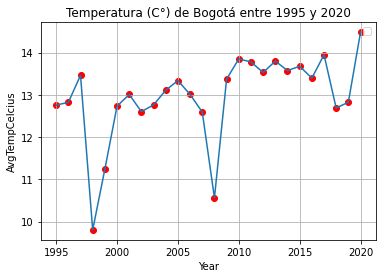

In [282]:
#d)
plt.plot(df2.Year[1:52:2],df2.AvgTempCelcius[1:52:2])
plt.scatter(df2.Year[1:52:2],df2.AvgTempCelcius[1:52:2],color='red')
plt.title("Temperatura (C°) de Bogotá entre 1995 y 2020")
plt.xlabel("Year")
plt.ylabel("AvgTempCelcius")
plt.grid()
plt.legend()

No handles with labels found to put in legend.


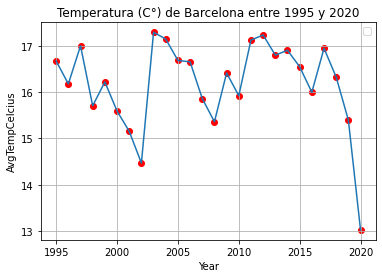

In [280]:
#e) El procedimiento para Barcelona es análogo
plt.plot(df2.Year[0:52:2],df2.AvgTempCelcius[0:52:2])
plt.scatter(df2.Year[0:52:2],df2.AvgTempCelcius[0:52:2],color='red')
plt.title("Temperatura (C°) de Barcelona entre 1995 y 2020")
plt.xlabel("Year")
plt.ylabel("AvgTempCelcius")
plt.grid()
plt.legend()

In [288]:
H = np.polynomial.hermite.Hermite.fit(df2.Year[1:52:2],df2.AvgTempCelcius[1:52:2], 5) #Polinomio por Hermite
H

Hermite([13.61352011, -0.93781078,  0.88883075, -0.51736221,  0.10559454,
       -0.02597792], domain=[1995., 2020.], window=[-1.,  1.])

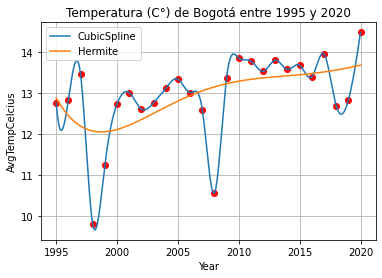

In [315]:
#f
from scipy.interpolate import CubicSpline

p=CubicSpline(df2.Year[1:52:2], df2.AvgTempCelcius[1:52:2]) #CubicSpline

x=np.linspace(df2.Year[1:52:2].min(),df2.Year[1:52:2].max(), 1000000)

plt.plot(df2.Year[1:52:2], df2.AvgTempCelcius[1:52:2], "ro")
plt.plot(x, p(x),"-",label="CubicSpline")
plt.plot(x, H(x),"-",label="Hermite")
plt.grid()
plt.title("Temperatura (C°) de Bogotá entre 1995 y 2020")
plt.xlabel("Year")
plt.ylabel("AvgTempCelcius")
plt.legend()

In [326]:
#g
optimize.fmin_powell(p, -1) #Valor mínimo de temperatura empleando el metodo de fmin powell

Optimization terminated successfully.
         Current function value: -inf
         Iterations: 1
         Function evaluations: 492


/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:2371: RuntimeWarning: overflow encountered in multiply
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:2364: RuntimeWarning: overflow encountered in multiply
  tmp1 = (xb - xa) * (fb - fc)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:2365: RuntimeWarning: overflow encountered in multiply
  tmp2 = (xb - xc) * (fb - fa)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:2366: RuntimeWarning: invalid value encountered in subtract
  val = tmp2 - tmp1
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1984: RuntimeWarning: invalid value encountered in subtract
  tmp1 = (x - w) * (fx - fv)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1985: RuntimeWarning: invalid value encountered in subtract
  tmp2 = (x - v) * (fx - fw)


array(1.07133759e+103)